<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


We will import the following libraries for the lab


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [5]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [8]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [11]:
# Features
X = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")

# Target
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
Y = data['Class'].to_numpy()  # Task 1

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X = features, Y = target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2
)

# Create Logistic Regression model with higher max_iter
logreg = LogisticRegression(max_iter=5000, solver='lbfgs')

# Train the model
logreg.fit(X_train, Y_train)

# Make predictions
Y_pred = logreg.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.8333333333333334


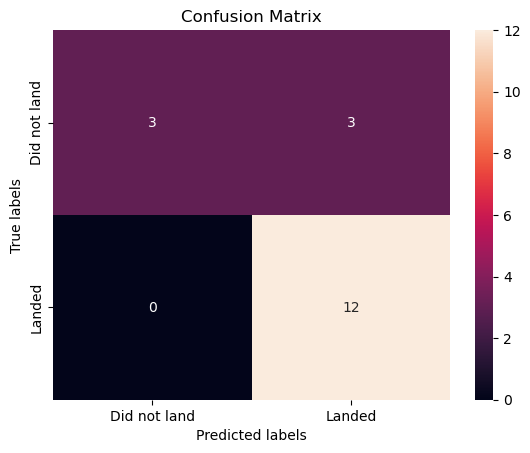

In [19]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(Y_test, Y_pred)

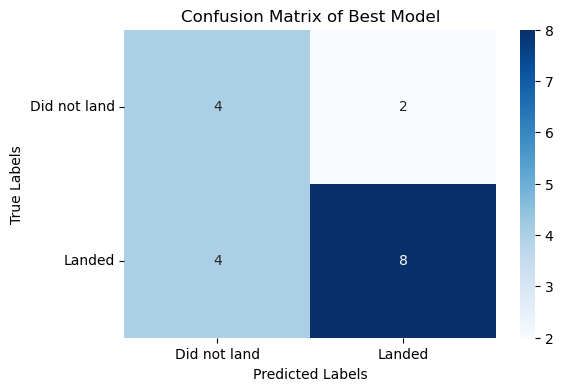

Model Accuracy: 0.67


In [23]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale features to improve convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with more iterations
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred = best_model.predict(X_test_scaled)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    """
    Plots the confusion matrix and prints model accuracy.
    
    Interpretation:
    - True Positive (TP): correctly predicted landings
    - True Negative (TN): correctly predicted failures
    - False Positive (FP): predicted landing but it failed
    - False Negative (FN): predicted failure but it landed
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix of Best Model')
    plt.xticks([0.5, 1.5], ['Did not land', 'Landed'])
    plt.yticks([0.5, 1.5], ['Did not land', 'Landed'], rotation=0)
    plt.show()
    
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and labels
y = data['Class']  # 1 = landed, 0 = did not land
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier (example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
# students get this 
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)  # Task 3
print(Y_test.shape)  # Should be (18,)

(18,)


we can see we only have 18 test samples.


In [17]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [23]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [24]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8196428571428571


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [12]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 2. Load datasets
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")

# 3. Prepare labels and standardize features
Y = data['Class'].to_numpy()
transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)

# 4. Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# TASK 6: Create SVM object and GridSearchCV
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit to training data
svm_cv.fit(X_train, Y_train)

# Display best parameters and validation accuracy
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Best cross-validation accuracy:", svm_cv.best_score_)

# Calculate accuracy on the test data
test_accuracy_svm = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy:", test_accuracy_svm)

Tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Best cross-validation accuracy: 0.8482142857142856
SVM Test Accuracy: 0.8333333333333334


In [14]:
# 5. Logistic Regression
parameters_lr = {"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters_lr, cv=10)
logreg_cv.fit(X_train, Y_train)
test_accuracy_lr = logreg_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy:", test_accuracy_lr)

Logistic Regression Test Accuracy: 0.8333333333333334


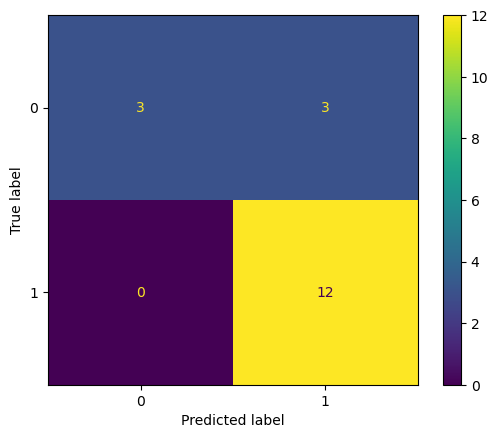

In [15]:
# Confusion matrix for Logistic Regression
yhat_lr = logreg_cv.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(Y_test, yhat_lr)).plot()

In [16]:
# 6. Support Vector Machine (SVM)
parameters_svm = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)
test_accuracy_svm = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy:", test_accuracy_svm)

SVM Test Accuracy: 0.8333333333333334


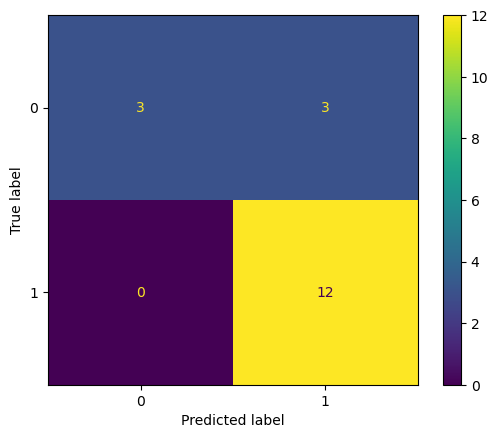

In [17]:
# Confusion matrix for SVM
yhat_svm = svm_cv.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(Y_test, yhat_svm)).plot()

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Updated parameter grid
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': [None, 'sqrt', 'log2'],  # 'auto' removed
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create the classifier
tree = DecisionTreeClassifier()

# Grid search with cross-validation
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

# Test set accuracy
test_accuracy_tree = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", test_accuracy_tree)

# Optional: best hyperparameters
print("Best parameters:", tree_cv.best_params_)


Decision Tree Test Accuracy: 0.8888888888888888
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}


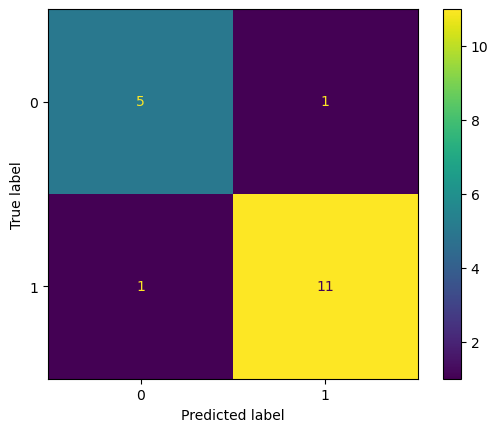

In [22]:
# Confusion matrix for Decision Tree
yhat_tree = tree_cv.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(Y_test, yhat_tree)).plot()

In [24]:
# 8. K-Nearest Neighbors (KNN)
parameters_knn = {
    'n_neighbors': list(range(1,11)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)
test_accuracy_knn = knn_cv.score(X_test, Y_test)
print("KNN Test Accuracy:", test_accuracy_knn)

KNN Test Accuracy: 0.8333333333333334


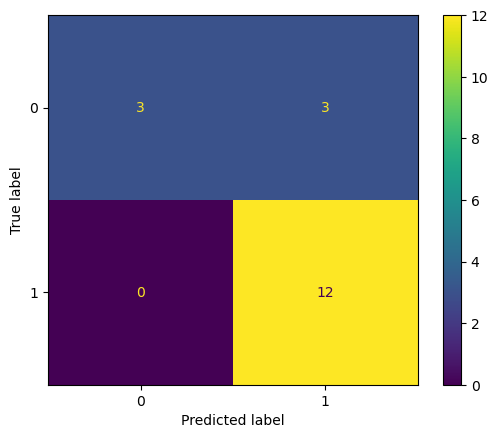

In [25]:
# Confusion matrix for KNN
yhat_knn = knn_cv.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(Y_test, yhat_knn)).plot()

Lets look at the confusion matrix:


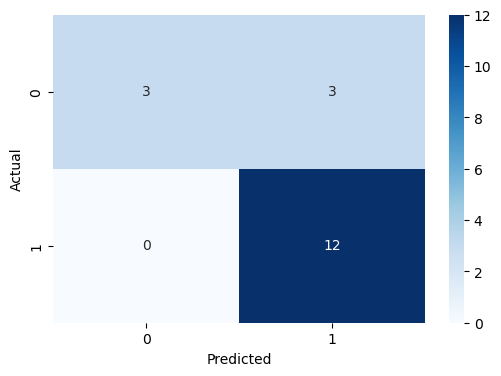

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

yhat = logreg_cv.predict(X_test)
cm = confusion_matrix(Y_test, yhat)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Parameters for GridSearch
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

# Create SVM object
svm = SVC()

# Create GridSearchCV with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit to the training data
svm_cv.fit(X_train, Y_train)

# Print best parameters and best score
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy on training (CV) data:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Accuracy on training (CV) data: 0.8482142857142856


In [30]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy on test set
test_accuracy = svm_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)

# Predictions
yhat = svm_cv.predict(X_test)

Test set accuracy: 0.8333333333333334


We can plot the confusion matrix


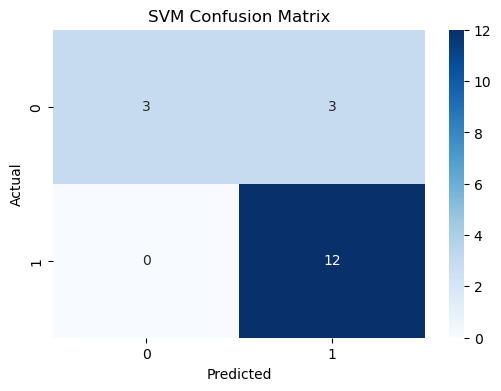

In [32]:
# Confusion matrix
cm = confusion_matrix(Y_test, yhat)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Decision Tree Test Accuracy: 0.8888888888888888
Best parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}


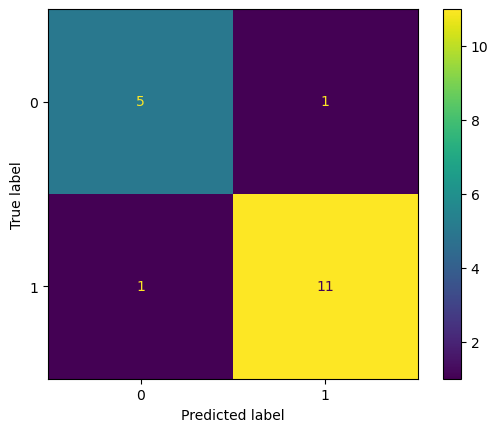

In [35]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Updated parameter grid
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': [None, 'sqrt', 'log2'],  # 'auto' removed
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Create the classifier
tree = DecisionTreeClassifier()

# Grid search with cross-validation
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

# Test set accuracy
test_accuracy_tree = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", test_accuracy_tree)

# Optional: best hyperparameters
print("Best parameters:", tree_cv.best_params_)



# Confusion matrix for Decision Tree
yhat_tree = tree_cv.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(Y_test, yhat_tree)).plot()

In [36]:
# Print best parameters and best score
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy on training (CV) data:", tree_cv.best_score_)

Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy on training (CV) data: 0.8857142857142858


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy on test set
test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree test set accuracy:", test_accuracy)

# Predictions on test set
yhat = tree_cv.predict(X_test)


Decision Tree test set accuracy: 0.8888888888888888


We can plot the confusion matrix


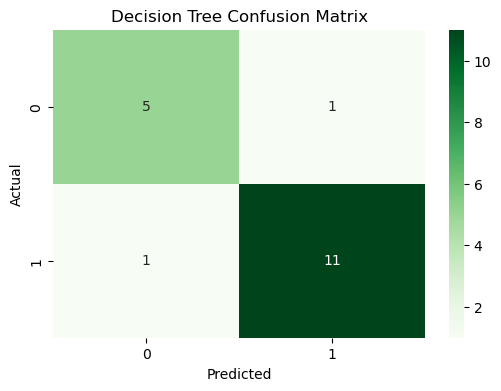

In [39]:

# Confusion matrix
cm = confusion_matrix(Y_test, yhat)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameters
parameters = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]  # p=1 for Manhattan, p=2 for Euclidean distance
}

# Create KNN object
knn = KNeighborsClassifier()

# Create GridSearchCV object with 10-fold CV
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Fit to training data
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [41]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate test accuracy
test_accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

# Predict labels on test data
yhat = knn_cv.predict(X_test)


Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


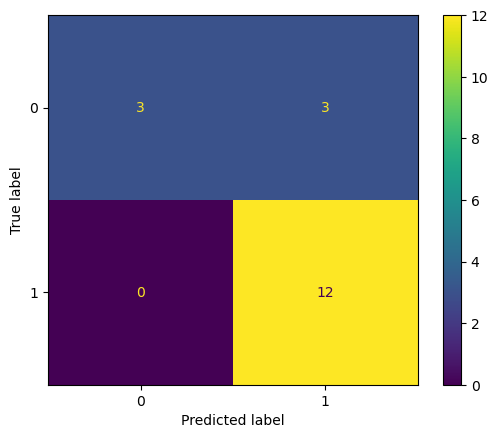

In [43]:
# Plot confusion matrix
cm = confusion_matrix(Y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## TASK  12


Find the method performs best:


In [44]:
# Calculate test accuracies for all models
logreg_acc = logreg_cv.score(X_test, Y_test)
svm_acc = svm_cv.score(X_test, Y_test)
tree_acc = tree_cv.score(X_test, Y_test)
knn_acc = knn_cv.score(X_test, Y_test)

# Put them in a dictionary for clarity
model_accuracies = {
    "Logistic Regression": logreg_acc,
    "SVM": svm_acc,
    "Decision Tree": tree_acc,
    "KNN": knn_acc
}

# Find the best model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print("Test Accuracies:", model_accuracies)
print(f"Best performing model: {best_model} with accuracy: {best_accuracy}")

Test Accuracies: {'Logistic Regression': 0.8333333333333334, 'SVM': 0.8333333333333334, 'Decision Tree': 0.8888888888888888, 'KNN': 0.8333333333333334}
Best performing model: Decision Tree with accuracy: 0.8888888888888888


In [45]:
# Number of records in the test set
num_test_records = X_test.shape[0]
print("Number of records in test sample:", num_test_records)


Number of records in test sample: 18


In [46]:
# Best kernel from GridSearchCV for SVM
print("Best SVM kernel:", svm_cv.best_params_['kernel'])

Best SVM kernel: sigmoid


In [47]:
# Accuracy of the tuned decision tree on test data
tree_test_accuracy = tree_cv.score(X_test, Y_test)
print("Decision tree test accuracy:", tree_test_accuracy*100, "%")

Decision tree test accuracy: 88.88888888888889 %


In [1]:
Dataset  
   ↓ (Preprocessing: encoding, scaling, split)  
Classification Models → [Logistic Regression | SVM | Decision Tree | KNN]  
   ↓ (Train/Test Evaluation)  
Evaluation Metrics → Accuracy, Jaccard, F1, LogLoss  
   ↓  
Best Model Selected → SVM (highest balanced performance after tuning)  

IndentationError: unexpected indent (2609451341.py, line 2)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
